# import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler



%matplotlib ipympl
plt.style.use('./deeplearning.mplstyle')

from utils import time_period, plot_dfs, plot_all_df_colones_in_different_plots
from utils import savitzky_golay, plot_smoothed_data_1,plot_smoothed_data_2, plot_smoothed_data_4
from setup_data import setup_data, setup_as_data, setup_an_data
from feature_adder import add_num_not_Nan



## Austevoll Sor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler



%matplotlib ipympl
plt.style.use('./deeplearning.mplstyle')

from utils import time_period, plot_dfs, plot_all_df_colones_in_different_plots
from utils import savitzky_golay, plot_smoothed_data_1,plot_smoothed_data_2, plot_smoothed_data_4
from setup_data import setup_data, setup_as_data
from feature_adder import add_num_not_Nan


Austevoll_Sor_file_path = "row_data\\SmartOcean-Data-featherfiles\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

row_data\SmartOcean-Data-featherfiles\Austevoll_data_instrument.feather


225

In [2]:
Austevoll_Sor_df[['System_Parameters.Input_Voltage']].head()

,System_Parameters.Input_Voltage
Time,
2022-10-24 15:00:00+00:00,12.3432
2022-10-24 15:30:00+00:00,12.3620
2022-10-24 16:00:00+00:00,12.3679
2022-10-24 16:30:00+00:00,12.3491
2022-10-24 17:00:00+00:00,12.0049


In [3]:
Austevoll_Sor_df.index

DatetimeIndex(['2022-10-24 15:00:00+00:00', '2022-10-24 15:30:00+00:00',
               '2022-10-24 16:00:00+00:00', '2022-10-24 16:30:00+00:00',
               '2022-10-24 17:00:00+00:00', '2022-10-24 17:30:00+00:00',
               '2022-10-24 18:00:00+00:00', '2022-10-24 18:30:00+00:00',
               '2022-10-24 19:00:00+00:00', '2022-10-24 19:30:00+00:00',
               ...
               '2025-01-10 00:30:00+00:00', '2025-01-10 01:00:00+00:00',
               '2025-01-10 03:00:00+00:00', '2025-01-10 05:30:00+00:00',
               '2025-01-10 08:30:00+00:00', '2025-01-10 09:00:00+00:00',
               '2025-01-10 10:30:00+00:00', '2025-01-10 12:00:00+00:00',
               '2025-01-10 14:00:00+00:00', '2025-01-10 14:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Time', length=22393, freq=None)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


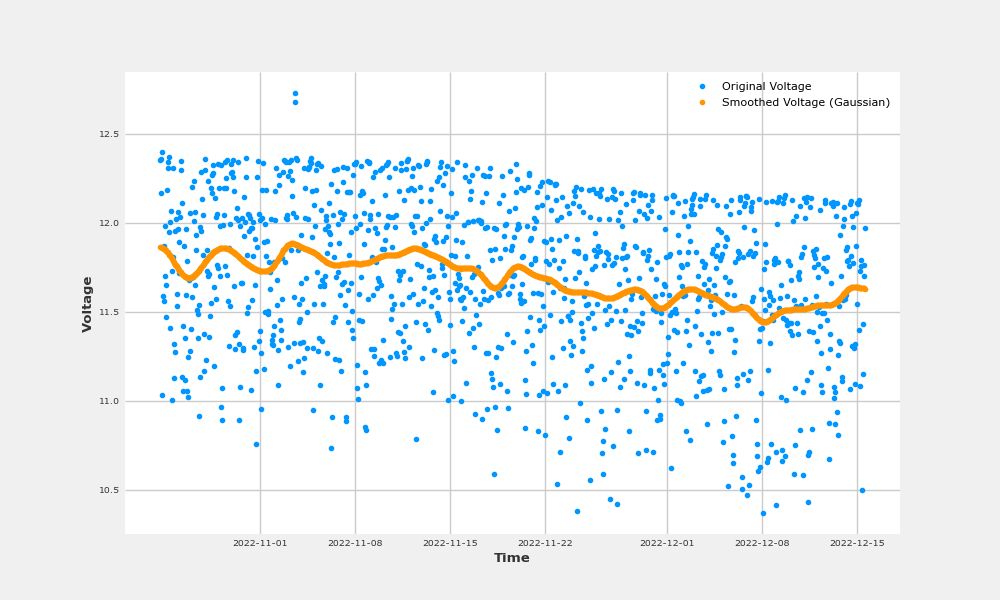

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


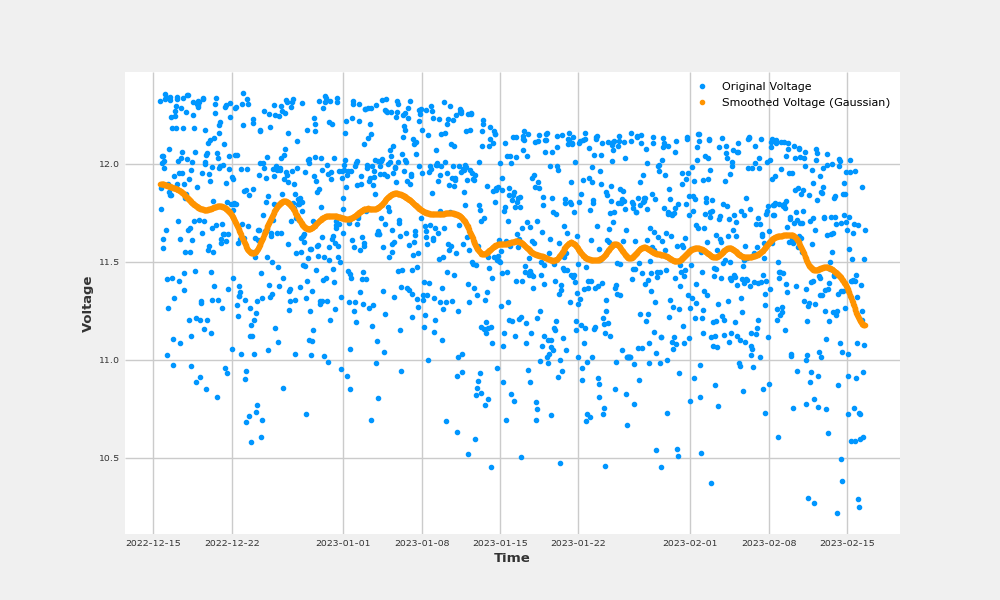

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


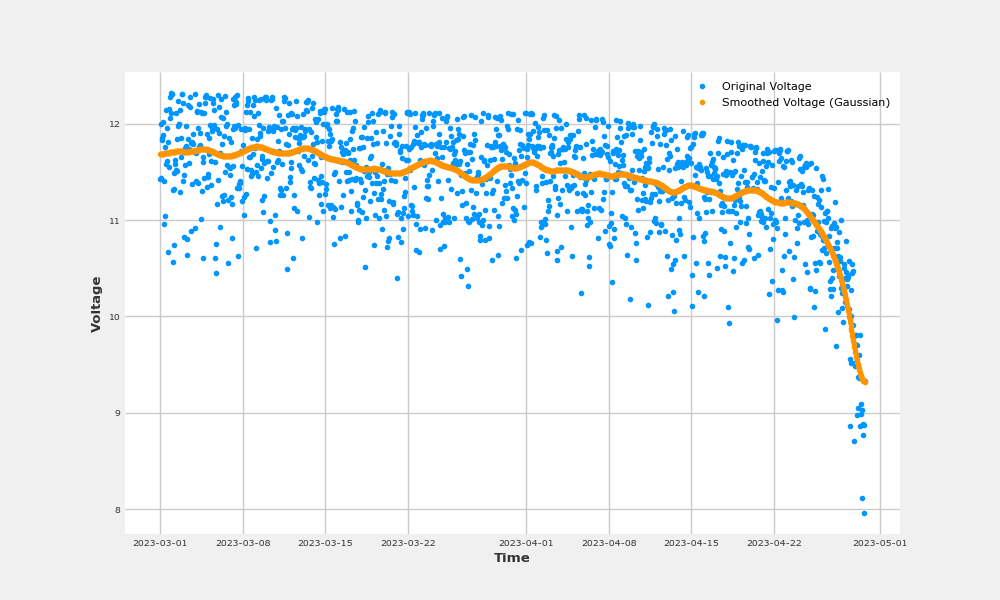

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


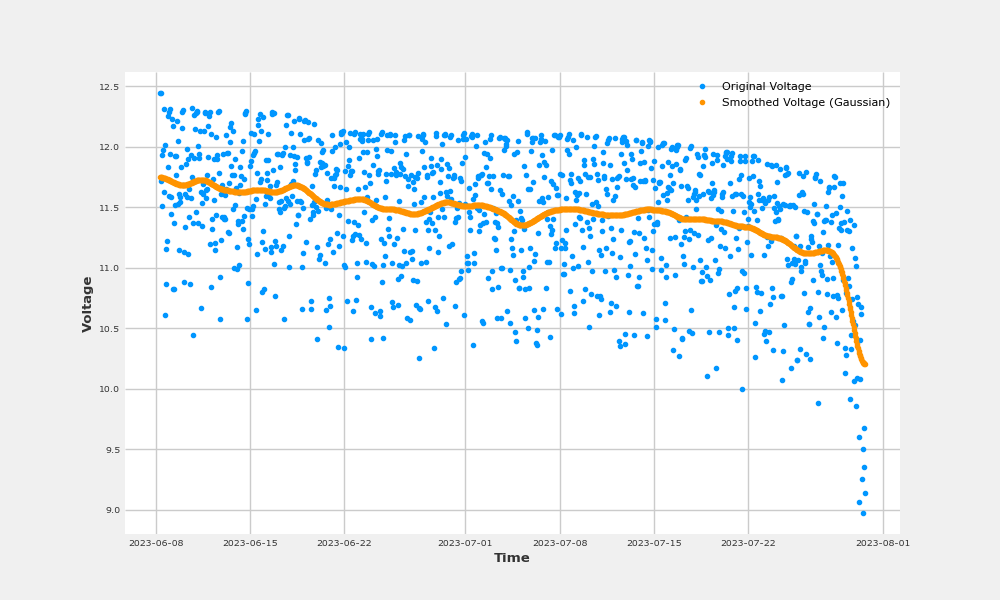

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


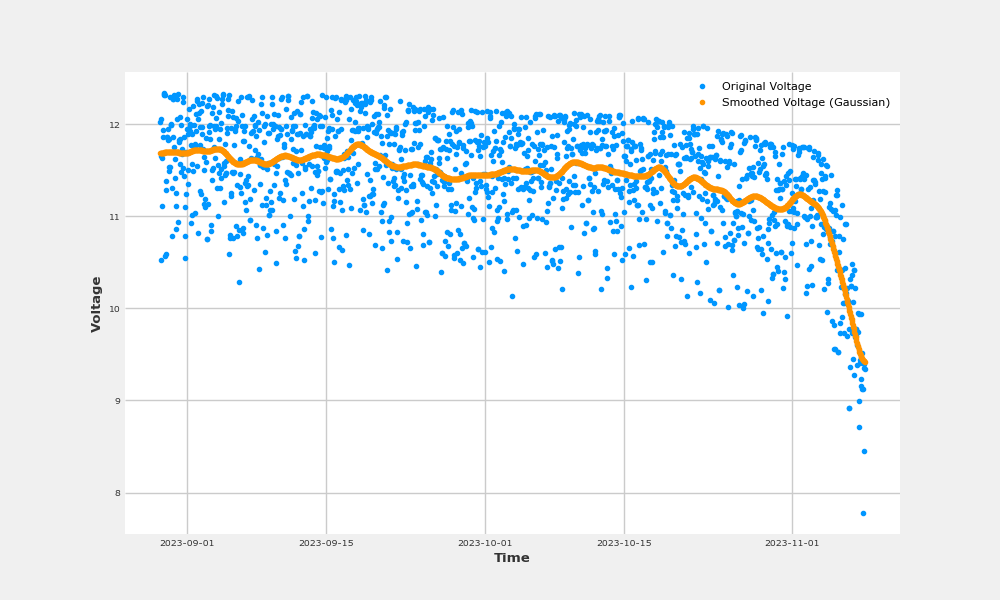

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


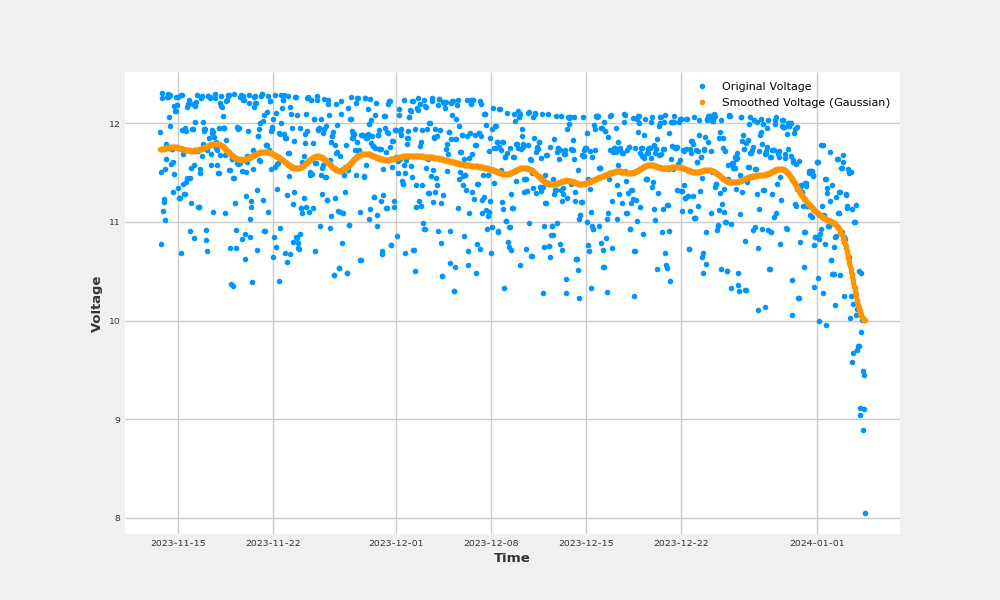

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


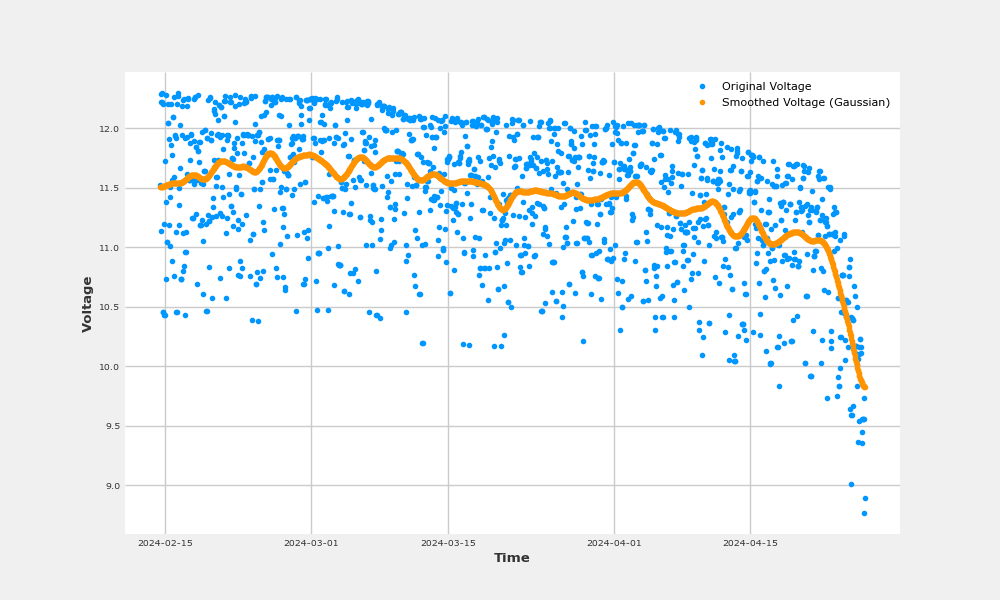

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


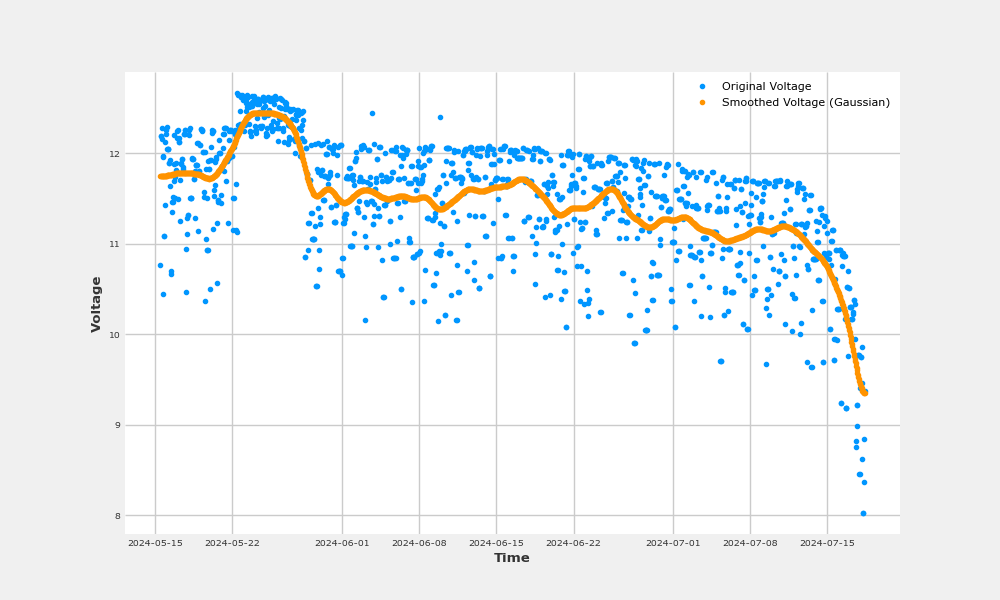

In [4]:
from setup_data import setup_as_data
list_segments = [1,2, 3,4,5,6,7,8]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=list_segments)

In [5]:
seg_3 = Austevoll_Sor_df_segments.get(7).head()
seg_3.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

In [6]:
seg_3 = Austevoll_Sor_df_segments.get(8)
#plot_dfs([seg_3[['System_Parameters.Input_Voltage']]])
#plot_dfs([seg_3[['Temperature']]])
#plot_dfs([seg_3[['cos_hour']]])
#plot_dfs([seg_3[['smooth_input_voltage']]], format='.')
#plot_dfs([seg_3[['Num_Not_Nan']]], format='.')

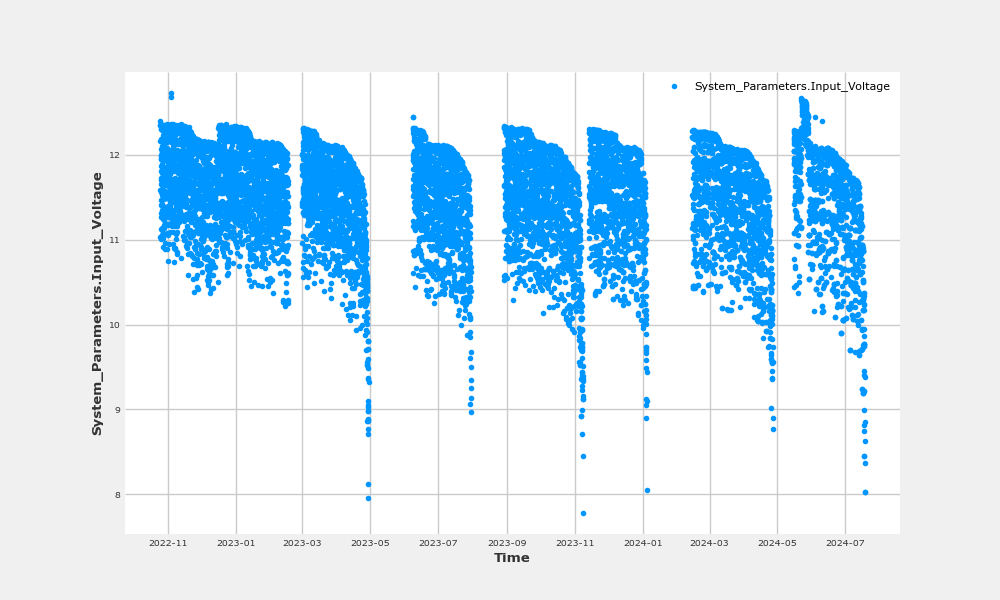

In [7]:
as_df = pd.concat(Austevoll_Sor_df_segments.values(), axis=0)
plot_dfs([as_df[['System_Parameters.Input_Voltage']]], format='.')

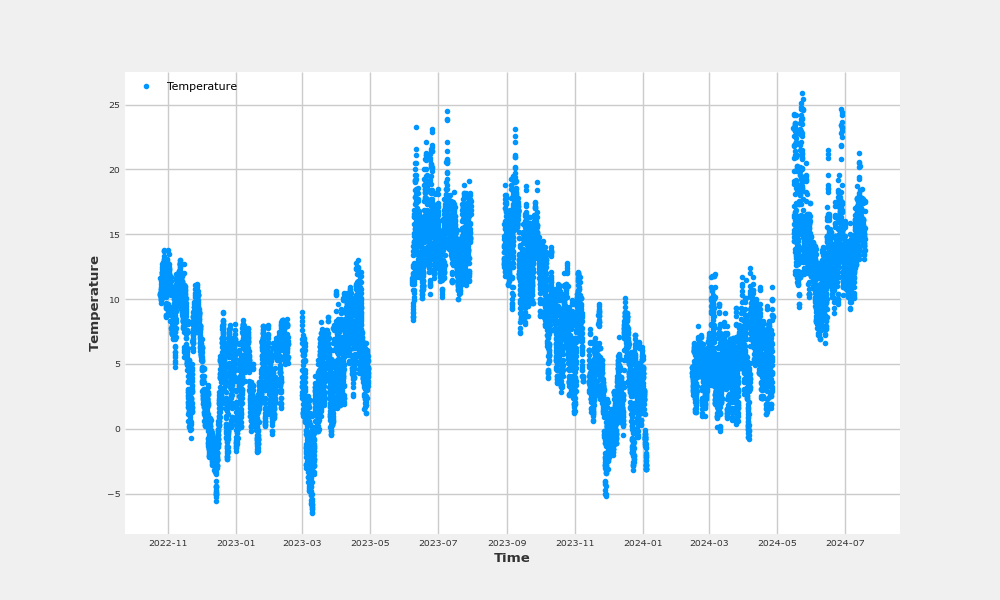

In [8]:
plot_dfs([as_df[['Temperature']]], format='.')

In [9]:
# Import the Scaler class and initialize two instances of it
from darts.dataprocessing.transformers import Scaler
scaler1 = Scaler()
scaler2 = Scaler()

In [10]:
seg_8 = Austevoll_Sor_df_segments.get(8)
seg_8[['System_Parameters.Input_Voltage', 'Num_Not_Nan']].head()

,System_Parameters.Input_Voltage,Num_Not_Nan
Time,,
2024-05-15 11:00:00,10.7675,20.0
2024-05-15 12:00:00,12.1859,20.0
2024-05-15 13:00:00,12.1859,20.0
2024-05-15 14:00:00,12.1562,15.0
2024-05-15 15:00:00,12.2769,15.0


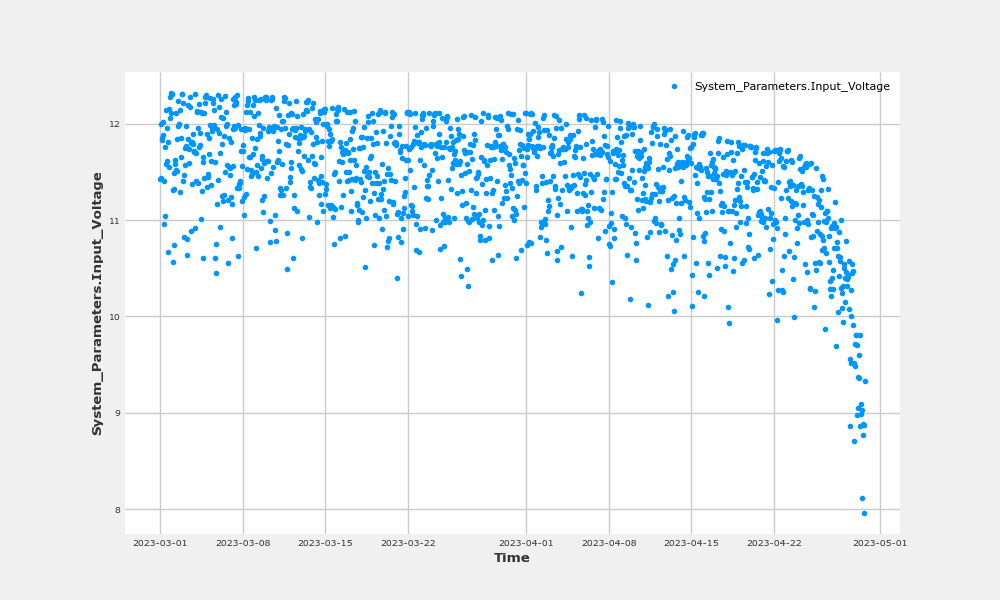

In [11]:
seg_8 = Austevoll_Sor_df_segments.get(3)
'''v_i = seg_8['System_Parameters.Input_Voltage']
y  = TimeSeries.from_series(v_i)
y = scaler1.fit_transform(y) # Fit and transform the data

seg_8['System_Parameters.Input_Voltage_n'] = y.values()'''
plot_dfs([seg_8[['System_Parameters.Input_Voltage']]], format='.')

In [12]:
seg_8.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

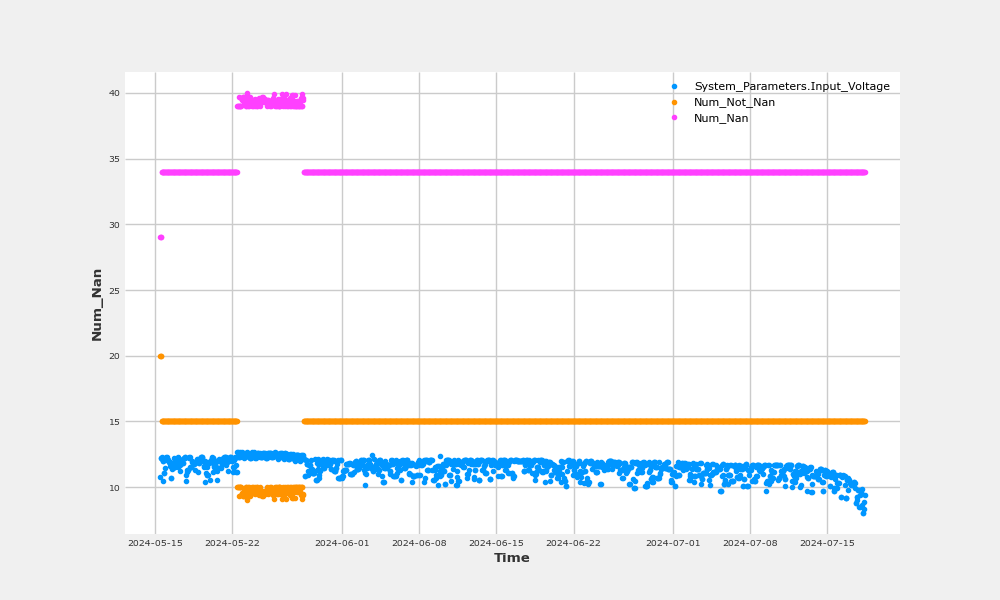

In [13]:
seg_8 = Austevoll_Sor_df_segments.get(8)
plot_dfs([seg_8[['System_Parameters.Input_Voltage', 'Num_Not_Nan', 'Num_Nan']]], format='.')

## Austevoll Nord

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler



%matplotlib ipympl
plt.style.use('./deeplearning.mplstyle')

from utils import time_period, plot_dfs, plot_all_df_colones_in_different_plots
from utils import savitzky_golay, plot_smoothed_data_1,plot_smoothed_data_2, plot_smoothed_data_4
from setup_data import setup_data
from feature_adder import add_num_not_Nan


Austevoll_Nord_file_path = "row_data\\SmartOcean-Data-featherfiles\\Austevoll_Nord\\Austevoll_data_instrument.feather"
print(Austevoll_Nord_file_path)
Austevoll_Nord_df = pd.read_feather(Austevoll_Nord_file_path)
Austevoll_Nord_df.set_index('Time', inplace=True)
len(Austevoll_Nord_df)

C:\Users\yfess\Desktop\data\row_data\SmartOcean-Data-featherfiles\Austevoll_Nord\Austevoll_data_instrument.feather


24219

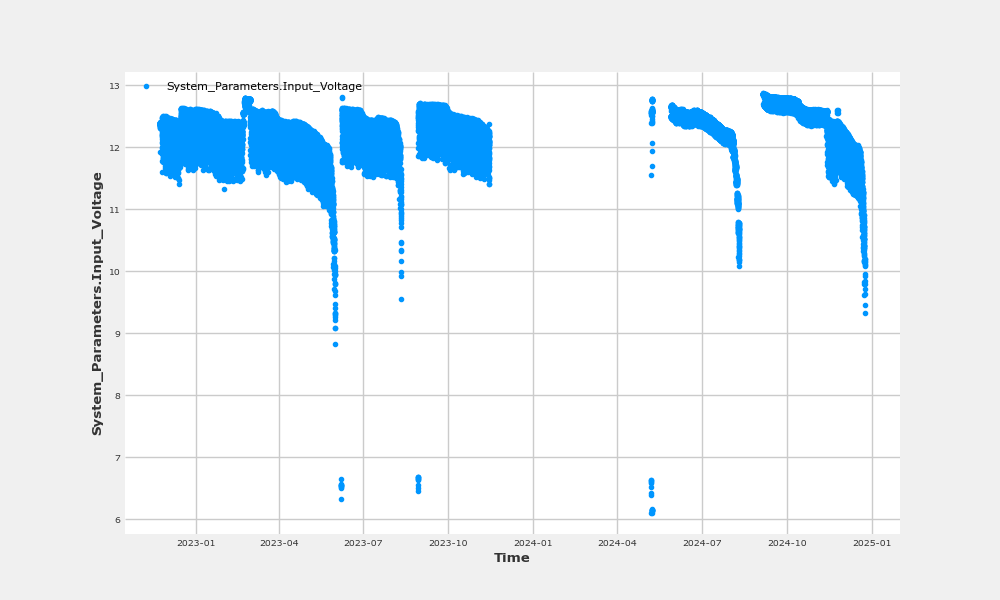

In [15]:
plot_dfs([Austevoll_Nord_df[['System_Parameters.Input_Voltage']]], format='.')

In [16]:
list_segments = [1,2,3,4,5,6,7]
an_segments = setup_an_data(Austevoll_Nord_df, smooth_sigma=18, list_segments=list_segments)

NameError: name 'setup_an_data' is not defined

In [ ]:
seg = an_segments.get(7)
seg.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

c:\Users\yfess\Desktop\data\utils.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


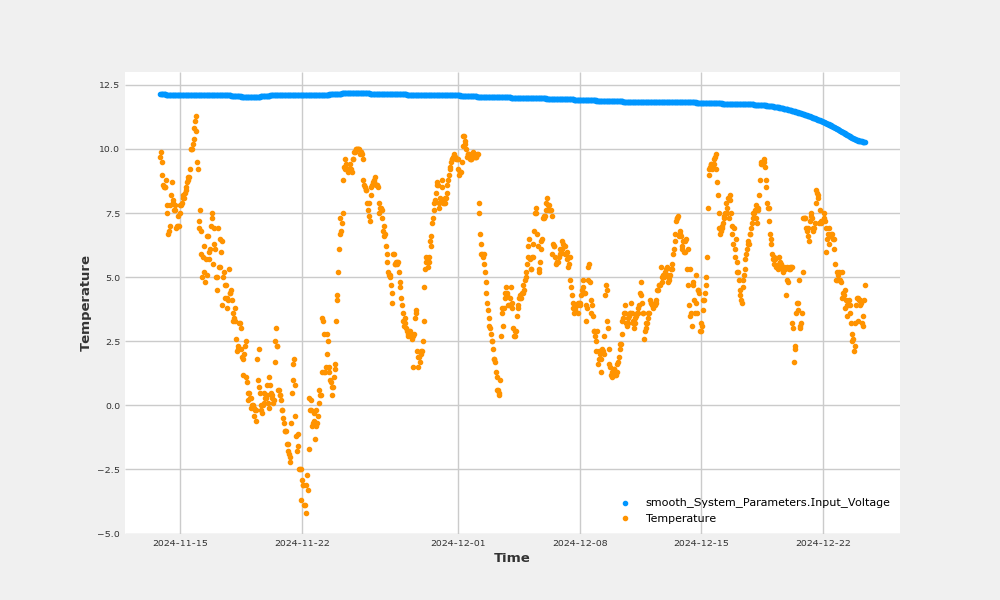

In [ ]:
plot_dfs([seg[['smooth_System_Parameters.Input_Voltage', 'Temperature']]], format='.')

In [ ]:
from feature_adder import normalize_data

seg, scaler_y = normalize_data(seg, 'System_Parameters.Input_Voltage')
seg, scaler_y_smooth = normalize_data(seg, 'smooth_System_Parameters.Input_Voltage')
seg.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'System_Parameters.Input_Voltage_n',
       'smooth_System_Parameters.Input_Voltage_n'],
      dtype='object')

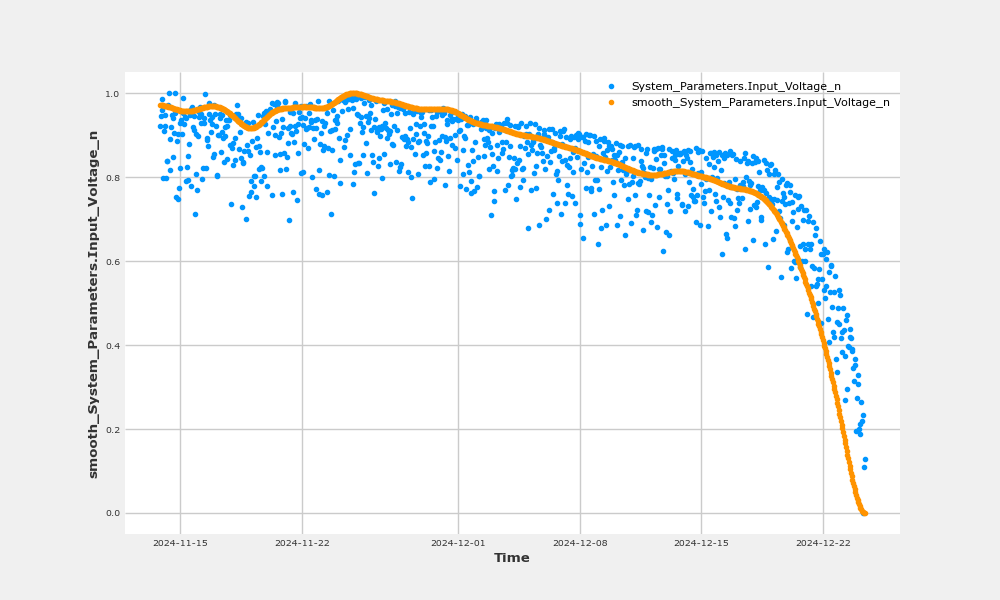

In [ ]:
plot_dfs([seg[['System_Parameters.Input_Voltage_n', 'smooth_System_Parameters.Input_Voltage_n' ]]], format='.')

In [ ]:
from feature_adder import inverse_transform
#inverse_transform(df: pd.DataFrame, column: str, scaler: Scaler)

seg = inverse_transform(seg, 'System_Parameters.Input_Voltage_n', scaler_y)
seg.columns


Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'System_Parameters.Input_Voltage_n',
       'smooth_System_Parameters.Input_Voltage_n',
       'System_Parameters.Input_Voltage_original'],
      dtype='object')

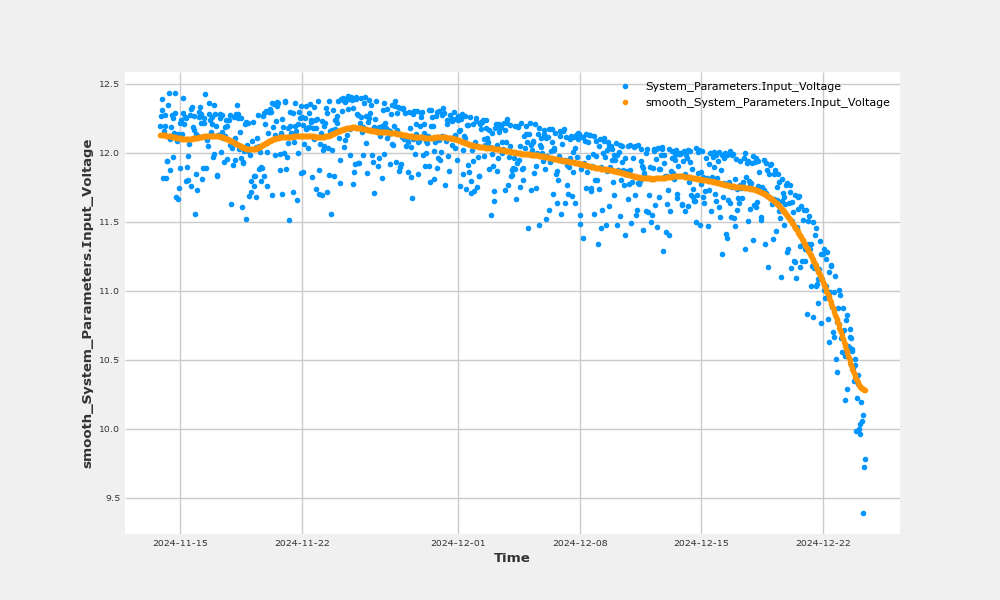

In [ ]:
plot_dfs([seg[['System_Parameters.Input_Voltage',   'smooth_System_Parameters.Input_Voltage']]], format='.')

In [ ]:
import pandas as pd

temp_json_path = "C:\\Users\\yfess\\Desktop\\data\\row_data\\frost_data.json"

temp_json_df = pd.read_json(temp_json_path)

time_series_data = []
for data in temp_json_df.data:
    time = data["referenceTime"]  # Extract time
    temperature = data["observations"][0]["value"]  # Extract temperature
    time_series_data.append((time, temperature))
    
temperature_df = pd.DataFrame(time_series_data, columns=["Time", "Temperature"])
temperature_df["Time"] = pd.to_datetime(temperature_df["Time"])
temperature_df.set_index("Time", inplace=True)
temperature_df.head()

temperature_df.to_csv("C:\\Users\\yfess\\Desktop\\data\\row_data\\frost_temperature_data.csv")
df_reasambled = temperature_df.copy().resample('1h').mean()



#temp_json_df.data[0]["referenceTime"],temp_json_df.data[0]["observations"][0]["value"], type(temp_json_df.data[0]["observations"][0]["value"])               

In [ ]:
df_reasambled = temperature_df.copy().resample('1h').mean()
df_reasambled.head()

,Temperature
Time,
2022-10-25 00:00:00+00:00,11.6
2022-10-25 01:00:00+00:00,10.4
2022-10-25 02:00:00+00:00,10.5
2022-10-25 03:00:00+00:00,10.4
2022-10-25 04:00:00+00:00,10.3


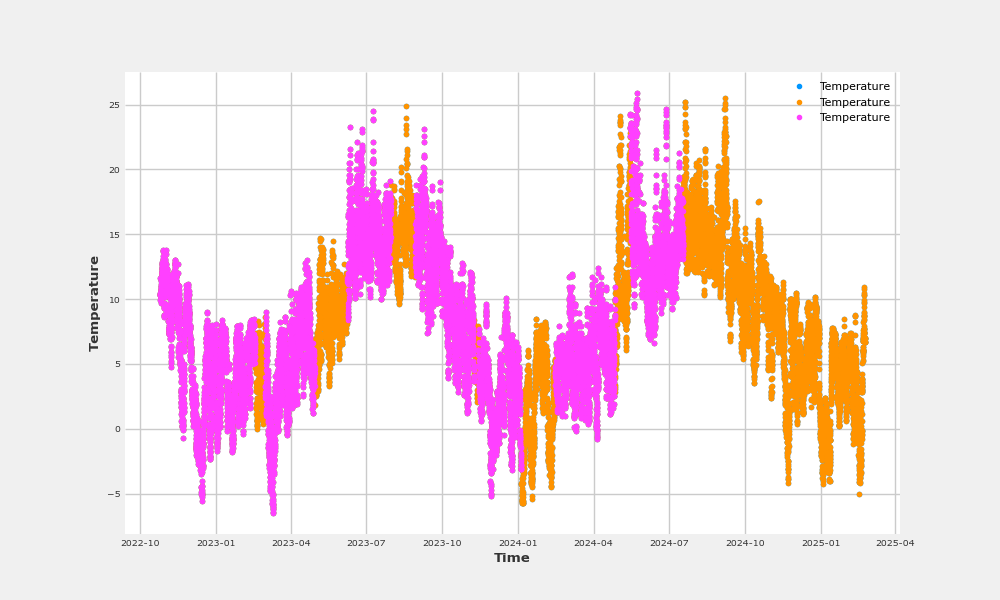

In [ ]:
plot_dfs([temperature_df[['Temperature']], df_reasambled[['Temperature']], as_df[['Temperature']]], format='.')

In [ ]:
frost_temperature_df = pd.read_csv("C:\\Users\\yfess\\Desktop\\data\\row_data\\frost_temperature_data.csv")
frost_temperature_df["Time"] = pd.to_datetime(frost_temperature_df["Time"])
frost_temperature_df.set_index("Time", inplace=True)


In [ ]:
def temp_sum_since_t0(df: pd.DataFrame):
    copy_df = df.copy()
    copy_df['Temperature_sum'] = copy_df['Temperature'].cumsum()
    return copy_df

In [ ]:
as_df.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

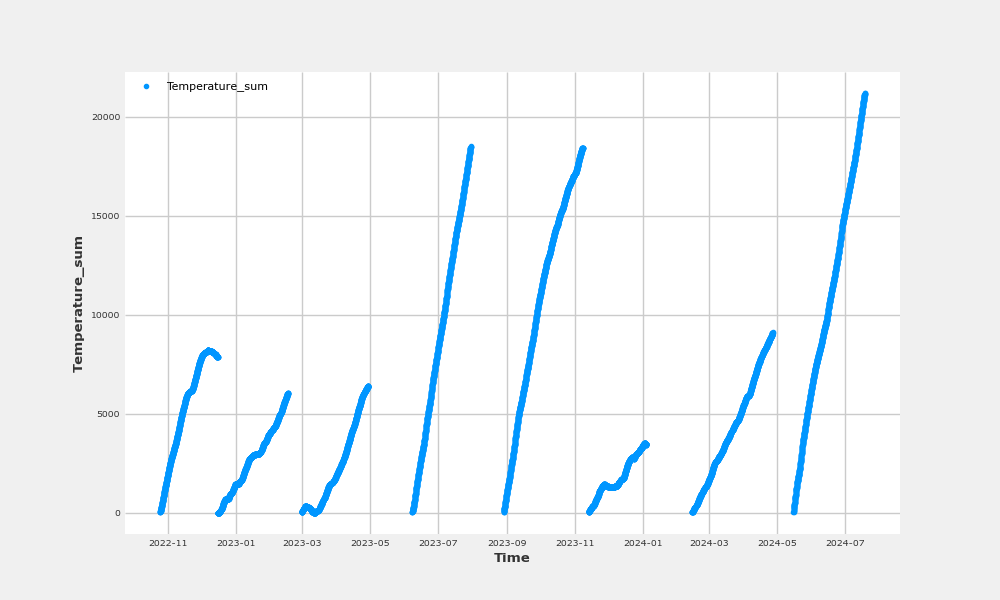

In [ ]:
plot_dfs([as_df[['Temperature_sum']],as_df[['Temperature_sum']]], format='.')

In [ ]:
as_df.columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

In [ ]:
type(an_segments)

dict

In [ ]:
from feature_adder import normalize_data

seg_scalers = {}

segments_copy = an_segments.copy()

for seg_key, seg_df in segments_copy.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    segments_copy[seg_key] = seg_df
    
    seg_scalers[seg_key] = scaler_y

print(seg_scalers)


{1: Scaler, 2: Scaler, 3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler}


In [ ]:
segments_copy[1].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'System_Parameters.Input_Voltage_n'],
      dtype='object')

# fin